Intersect Total: 3.6055512754639896
Actual Line: 3.6055512754639896


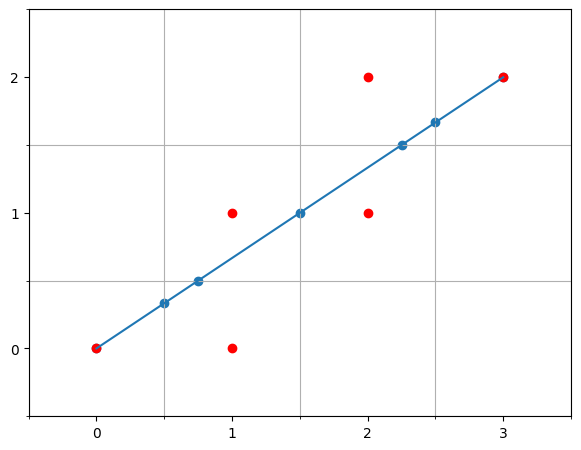

Completion time: 0.24837684631347656
List of cells that line travels through and the distance traveled within each cell:
[(0, 0, 0.6009252125773316), (1, 0, 0.3004626062886658), (1, 1, 0.9013878188659974), (2, 1, 0.9013878188659974), (2, 2, 0.3004626062886657), (3, 2, 0.6009252125773317)]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math

# Function that finds what grid cells a line intersects with as well as the length of the line that is within each intersection cell
def get_intersect_cells(start, end, plot = False):
  
  # If start and end point are same, return start point with length of 0
  if(start == end):
    return([(start[0],start[1],0)])
  
  intersect_cell_lengths = []
  x_int = []
  y_int = []

  # If line is vertical
  if(start[0] == end[0]):
    for i in range(start[1],(end[1] + -np.sign(start[1] - end[1])), -np.sign(start[1] - end[1])):
      if(i == start[1] or i == end[1]):
        leng = .5
      else:
        leng  = 1
      intersect_cell_lengths.append((start[0], i, leng))
        
  # If line is horizontal
  elif(start[1] == end[1]):
    for i in range(start[0], end[0] + -np.sign(start[0] - end[0]), -np.sign(start[0] - end[0])):
      if(i == start[0] or i == end[0]):
        leng = .5
      else:
        leng = 1
      intersect_cell_lengths.append((i,start[1], leng))

  # If line is diagonal with positive slope
  elif((end[1] - start[1])/(end[0] - start[0]) == 1):
    for i in range(abs(start[0] - end[0]) + 1):
      if(i == 0 or i == abs(start[0] - end[0])):
        leng = 0.70710678
      else:
        leng = 1.41421356
      intersect_cell_lengths.append((start[0] + (-np.sign(start[0] - end[0])*i), start[1] + (-np.sign(start[0] - end[0])*i), leng))

  # If line is diagonal with negative slope
  elif((end[1] - start[1])/(end[0] - start[0]) == -1):
    for i in range(abs(start[0] - end[0]) + 1):
      if(i == 0 or i == abs(start[0] - end[0])):
        leng = 0.70710678
      else:
        leng = 1.41421356
      intersect_cell_lengths.append((start[0] + (-np.sign(start[0] - end[0])*i), start[1] - (np.sign(start[1] - end[1])*i), leng))

  # If line is on any other angle
  else:
    int_cell_points = {}

    # Get all x coordinates along line that intersect vertical grid line
    start_x = min(start[0],end[0])
    end_x = max(start[0],end[0])
    xs = np.linspace(start_x+.5, end_x-.5, end_x-start_x).tolist()

    # Get all y coordinates along line that intersect horizonatal grid line
    start_y = min(start[1],end[1])
    end_y = max(start[1],end[1])
    ys = np.linspace(start_y+.5, end_y-.5, end_y-start_y).tolist()

    # Add start and end point to dictionary of intersect cells as well as list of points that intersect vertical grid lines
    int_cell_points[str(start[0]) + ":" + str(start[1])] = [(start[0],start[1])]
    int_cell_points[str(end[0]) + ":" + str(end[1])] = [(end[0],end[1])]
    x_int.append([start[0],start[1]])
    x_int.append([end[0],end[1]])

    # Loop through all x oordinates along line that intersect vertical grid line
    for x in xs:
      # Calculate the slope of the line
      slope = (end[1] - start[1]) / (end[0] - start[0])
      
      # Calculate the y intercept of the line
      y_intercept = start[1] - slope * start[0]
        
      # Calculate the y coordinate of the point on the line with the given x coordinate
      y_coordinate = slope * x + y_intercept

      # Add point to list of points that intersect vertical grid lines 
      x_int.append([x,y_coordinate])

      cells = []

      # If grid intersect point is on an intersection of a horizontal and vertical grid line, assign point to all 4 surrounding cells 
      if((str(x)[-2:] == '.5') and (str(y_coordinate)[-2:] == '.5')):
        top_left_cell = (int(x - 0.5), int(y_coordinate + 0.5))
        top_right_cell = (int(x + 0.5), int(y_coordinate + 0.5))
        bottom_left_cell = (int(x - 0.5), int(y_coordinate - 0.5))
        bottom_right_cell = (int(x + 0.5), int(y_coordinate - 0.5))
        cells = [str(top_left_cell[0]) + ":" + str(top_left_cell[1]), str(top_right_cell[0]) + ":" + str(top_right_cell[1]), str(bottom_left_cell[0]) + ":" + str(bottom_left_cell[1]), str(bottom_right_cell[0]) + ":" + str(bottom_right_cell[1])]

      # Else, assign point to just left and right cell
      else:
        left_cell = (int(x - 0.5), int(round(y_coordinate)))
        right_cell = (int(x + 0.5), int(round(y_coordinate)))
        cells = [str(left_cell[0]) + ":" + str(left_cell[1]), str(right_cell[0]) + ":" + str(right_cell[1])]

      for cell_name in cells:
        # If cell isn't in dictionary, add it
        if cell_name not in int_cell_points:
          int_cell_points[cell_name] = []
        # Assign point to cell
        int_cell_points[cell_name].append((x,y_coordinate))
        # If a cell has 2 assigned points, calculate length of line within cell based on those 2 points and add it to list to be returned
        if len(int_cell_points[cell_name]) == 2:
          cell_x = int(float(cell_name.split(":")[0]))
          cell_y = int(float(cell_name.split(":")[1]))
          intersect_cell_lengths.append((cell_x, cell_y, math.dist(int_cell_points[cell_name][0],int_cell_points[cell_name][1])))

    # Loop through all y coordinates along line that intersect vertical grid line
    for y in ys:
      # Calculate the slope of the line
      slope = (end[0] - start[0]) / (end[1] - start[1])
        
      # Calculate the x intercept of the line
      x_intercept = start[0] - slope * start[1]
        
      # Calculate the x coordinate of the point on the line with the given y coordinate
      x_coordinate = slope * y + x_intercept

      if [x_coordinate,y] not in x_int:
        y_int.append([x_coordinate,y])
        # Assign point to top and bottom cell
        top_cell = (int(round(x_coordinate)), int(y + 0.5))
        bottom_cell = (int(round(x_coordinate)), int(y - 0.5))
        top_bottom_cells = [str(top_cell[0]) + ":" + str(top_cell[1]), str(bottom_cell[0]) + ":" + str(bottom_cell[1])]

        for cell_name in top_bottom_cells:
          # If cell isn't in dictionary, add it
          if cell_name not in int_cell_points:
              int_cell_points[cell_name] = []
          # Assign point to cell
          int_cell_points[cell_name].append((x_coordinate,y))
          # If a cell has 2 assigned points, calculate length of line within cell based on those 2 points and add it to list to be returned
          if len(int_cell_points[cell_name]) == 2:
            cell_x = int(float(cell_name.split(":")[0]))
            cell_y = int(float(cell_name.split(":")[1]))
            intersect_cell_lengths.append((cell_x, cell_y, math.dist(int_cell_points[cell_name][0],int_cell_points[cell_name][1])))

    # Sorting the intersect cells in the correct order
    if (start[0] < end[0]):
      # Sort X ascending
      intersect_cell_lengths.sort()
      # Bottom left to top right, sort Y ascending
      if (start[1] < end[1]):
        intersect_cell_lengths.sort(key=lambda a: a[1])
      # Top left to bottom right, sort Y descending
      else:
        intersect_cell_lengths.sort(key=lambda a: a[1], reverse = True)
    
    else:
      # Sort X descending
      intersect_cell_lengths.sort(reverse = True)
      # Bottom right to top left, sort Y ascending
      if (start[1] < end[1]):
        intersect_cell_lengths.sort(key=lambda a: a[1])
      # Top right to bottom left, sort Y descending
      else:
        intersect_cell_lengths.sort(key=lambda a: a[1], reverse = True)


  # Displaying line and intersecting cells and points on grid
  if plot:
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(1, 1, 1)

    # Plotting line
    plt.plot([start[0],end[0]],[start[1],end[1]])

    # Plotting sampled points along line
    if(x_int):
      points = x_int + y_int
      sample_xs, sample_ys = zip(*points)
      plt.scatter(sample_xs, sample_ys)

    # Plotting which cells intersect with line
    cell_xs = [c[0] for c in intersect_cell_lengths]
    cell_ys = [c[1] for c in intersect_cell_lengths]
    plt.scatter(cell_xs, cell_ys, color = 'red')

    # Checking to see if all intersection lengths combined is equal to total line length
    tot = sum([c[2] for c in intersect_cell_lengths])
    print("Intersect Total: " + str(tot))
    print("Actual Line: " + str(math.dist(start,end)))

    # Showing grid cell borders
    minor_ticks_x = np.arange(min(start[0],end[0]) - .5, max(start[0],end[0]) + 1.5, 1)
    major_ticks_x = np.arange(min(start[0],end[0]), max(start[0],end[0]) + 1, 1)

    minor_ticks_y = np.arange(min(start[1],end[1]) - .5, max(start[1],end[1]) + 1.5, 1)
    major_ticks_y = np.arange(min(start[1],end[1]), max(start[1],end[1]) + 1, 1)

    ax.set_xticks(major_ticks_x)
    ax.set_xticks(minor_ticks_x, minor=True)
    ax.set_yticks(major_ticks_y)
    ax.set_yticks(minor_ticks_y, minor=True)
    ax.grid(which='minor', alpha=1)
    ax.grid(which='major', alpha=0)
    ax.set_aspect('equal')
    plt.show()

  return intersect_cell_lengths

start = [0,0]
end = [3,2]

s = time.time()
cells = get_intersect_cells(start,end, plot = True)
print("Completion time: " + str(time.time()-s))
print("List of cells that line travels through and the distance traveled within each cell:")
print(cells)